In [1]:
%matplotlib notebook

In [34]:
import re
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
import os

from lib import figure_util
from figures.figure_model_summary import  simulation_processor

In [10]:

def plot_sigb(ax, biofilm_df, **kwargs):
    grped = biofilm_df.groupby("dist")
    sigbd, = ax.plot(grped["dist"].median(), grped["Bsamp"].mean(), **kwargs)
    # ax.fill_between(grped["dist"].median(),
    #                 grped["Bsamp"].mean() - grped["Bsamp"].sem(),
    #                 grped["Bsamp"].mean() + grped["Bsamp"].sem(), alpha=0.4, **kwargs)
    return ax, sigbd

def get_figure(ax, wt_df, x2_df, **kwargs):
    ax, wtp = plot_sigb(ax, wt_df, color=figure_util.strain_color["JLB077"], label="WT")
    ax, x2p = plot_sigb(ax, x2_df, color=figure_util.strain_color["JLB117"], label="2xQP")
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)
    ax.legend()
    return ax, [wtp, x2p]
    

<IPython.core.display.Javascript object>


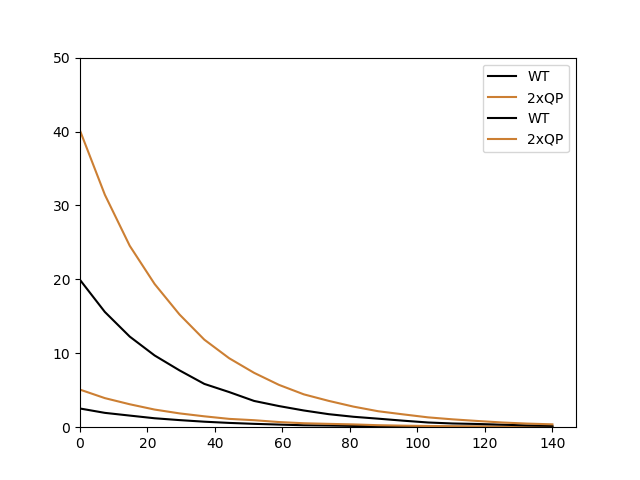

(0, 50)

In [24]:

runf = "../../../stochastic/algo/luna/final_sweeps/"
pulse_wt_info = ("Pulsing dynamics WT", glob(runf + "movethresh3/bfsim_b_qp|*pscale_a=0.7*,pscale_b=0.25*.tsv")[0])
pulse_2x_info = ("Pulsing dynamics 2xQP", glob(runf + "movethresh3/bfsim_b_qp|*pscale_a=0.7*,pscale_b=0.5*.tsv")[0])
bistb_wt_info = ("Bistable WT", glob(runf + "movethresh3/bfsim_b_qp|*pscale_a=3.6*,pscale_b=2.0*.tsv")[0])
bistb_2x_info = ("Bistable 2xQP", glob(runf + "movethresh3/bfsim_b_qp|*pscale_a=3.6*,pscale_b=4.0*.tsv")[0])

fig, ax = plt.subplots(1,1)
pulse_wt_df = simulation_processor.get_dataset(pulse_wt_info[1], max_distance=140.0,  spore_time_hours=0.5)
pulse_2x_df = simulation_processor.get_dataset(pulse_2x_info[1], max_distance=140.0,  spore_time_hours=0.5)

bistb_wt_df = simulation_processor.get_dataset(bistb_wt_info[1], max_distance=140.0,  spore_time_hours=0.5)
bistb_2x_df = simulation_processor.get_dataset(bistb_2x_info[1], max_distance=140.0,  spore_time_hours=0.5)

ax, sbplots = get_figure(ax, pulse_wt_df, pulse_2x_df)
ax, sbplots = get_figure(ax, bistb_wt_df, bistb_2x_df)

ax.set_ylim(0, 50)


<IPython.core.display.Javascript object>


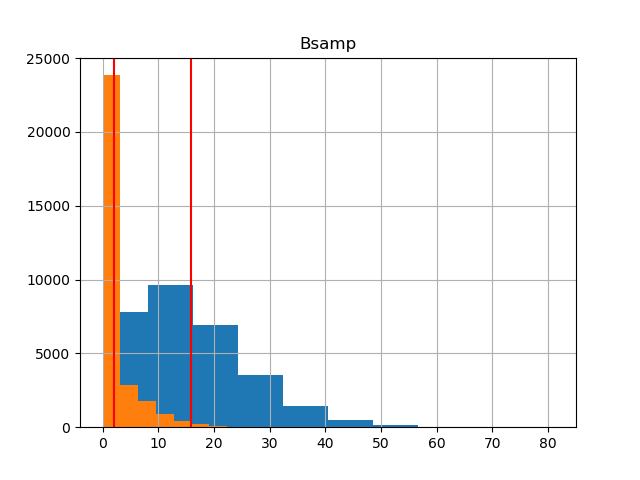

In [27]:
fig, ax = plt.subplots(1,1)
bist_wt_top = bistb_wt_df.loc[bistb_wt_df["dist"] < 20, ["Bsamp"]]
bist_wt_top.hist(ax=ax)
ax.axvline(bist_wt_top["Bsamp"].mean(), color="red")

pulse_wt_top = pulse_wt_df.loc[pulse_wt_df["dist"] < 20, ["Bsamp"]]
pulse_wt_top.hist(ax=ax)
ax.axvline(pulse_wt_top["Bsamp"].mean(), color="red")


## Try reproduce the correlation graph

In [68]:

runf = "../../../stochastic/algo/luna/final_sweeps/"
pulse_wt_info = ("Pulsing dynamics WT", glob(runf + "movethresh3/bfsim_avb_qp|*pscale_a=0.7*,pscale_b=0.25*.tsv")[0])
pulse_wt_avb = simulation_processor.get_dataset(pulse_wt_info[1], max_distance=140.0,  spore_time_hours=0.5)

pulse_2qp_info = ("Pulsing dynamics WT", glob(runf + "movethresh3/bfsim_avb_qp|*pscale_a=0.7*,pscale_b=0.5*.tsv")[0])
pulse_2qp_avb = simulation_processor.get_dataset(pulse_2qp_info[1], max_distance=140.0,  spore_time_hours=0.5)


In [32]:
pulse_wt_avb.head()

,Amax,Asamp,Atime,Bsamp,dist,seed,sim_id,stress,threshold,stress_10,resp_a,resp_b,spore
0,0,0,0.000000,0,140.0,916204916,0,0.00005,0.0,-4.30103,0.000035,0.000013,False
1,0,0,0.000000,0,140.0,599284966,1,0.00005,0.0,-4.30103,0.000035,0.000013,False
2,17,0,1198.728866,0,140.0,251703136,2,0.00005,0.0,-4.30103,0.000035,0.000013,False
3,0,0,0.000000,0,140.0,1697086002,3,0.00005,0.0,-4.30103,0.000035,0.000013,False
4,0,0,0.000000,0,140.0,1235562777,4,0.00005,0.0,-4.30103,0.000035,0.000013,False


In [49]:
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>


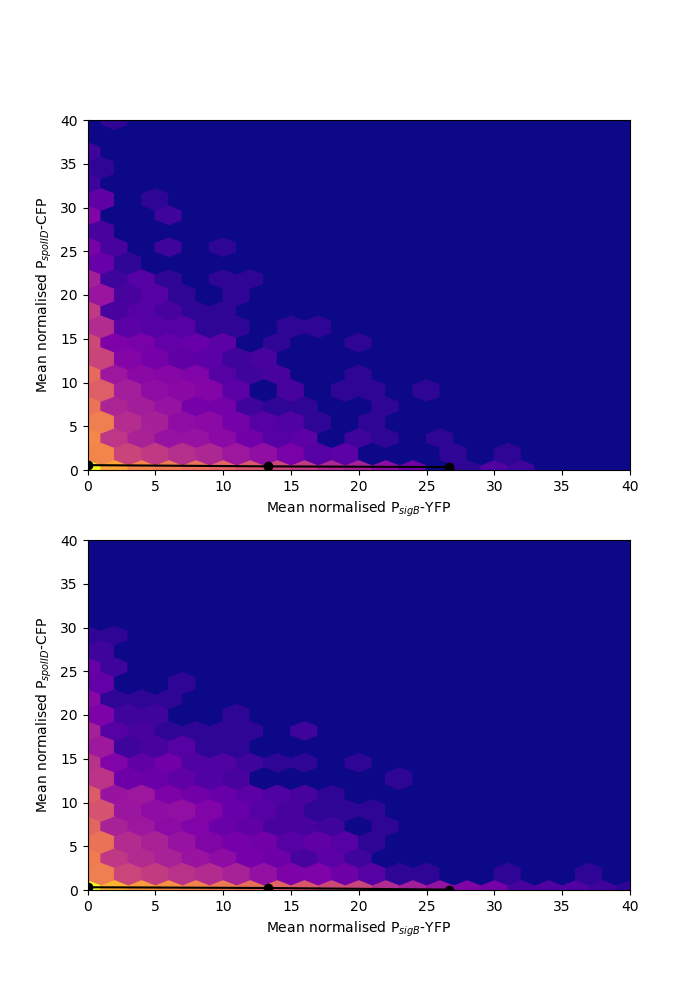

0.574475
Cell N: 200000
[28851   724     9]
1.146555
Cell N: 200000
[46956  2343    69]


In [75]:

blu_chan = "Asamp"
grn_chan = "Bsamp"

fig, axes = plt.subplots(2,1)
fig.set_size_inches(7,10)

gs = 20
cfpmax = 40 
yfpmax = 40 

for a, timsct in enumerate([(pulse_wt_avb, pulse_2qp_avb]):
    ax = axes[a]
    print(timsct[grn_chan].mean())
    #timsct = timsct[timsct[grn_chan] != 0]
    kwargs = {"gridsize":gs, 
                #"marginals":True, 
                "extent":[0, yfpmax, 0, cfpmax], 
                #"bins": "log"
                "norm": matplotlib.colors.LogNorm() ,
                "cmap": plt.get_cmap("plasma")
            }

    print("Cell N:", len(timsct) )
    hb = ax.hexbin(timsct[grn_chan], timsct[blu_chan], **kwargs)
    timsct["one"] = 1

    green_bins = np.linspace(0, cfpmax, 4)
    green_x = green_bins[1:] - (green_bins[1] - green_bins[0])
    cfp_trend = timsct.groupby(pd.cut(timsct[grn_chan], green_bins)).mean()
    print(timsct.groupby(pd.cut(timsct[grn_chan], green_bins)).sum()["one"].values)

    ax.plot(green_x, cfp_trend[blu_chan].values, "-o", color="k")
    #ax.set_title("vs PsigB-YFP")
    ax.set_xlabel("Mean normalised P$_{sigB}$-YFP")
    ax.set_ylabel("Mean normalised P$_{spoIID}$-CFP")
    axes[a]= ax

<IPython.core.display.Javascript object>


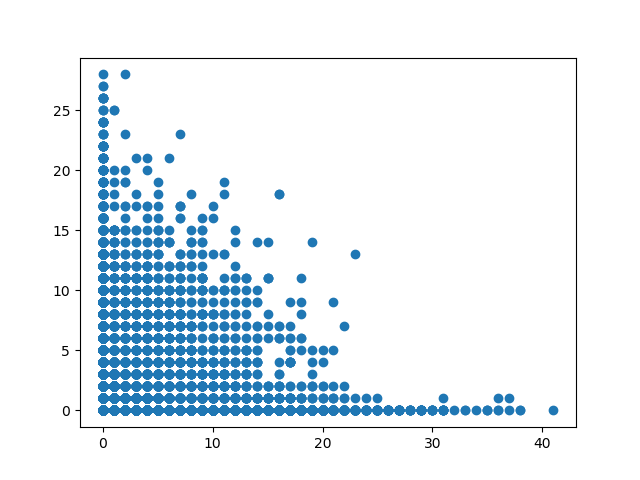

In [60]:
fig = plt.figure()
plt.scatter(timsct["Bsamp"], timsct["Asamp"])